# Integrasjon

__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

![Integral](./img/integral.png)

**[Integralregning](https://snl.no/integralregning) er en matematisk operasjon som utføres på en matematisk funksjon. Tenk deg at vi har en kurve  $y=f(x)$ og to ordinater $x = a$ og $x = b$. Matematisk svarer beregning av flateinnholdet $S$ til integrasjon. Det arealet $S$ som begrenses av x-aksen, kurven og de to ordinatene, er gitt ved et bestemt integral. Dette kan skrives som:**

$$ S = \int_{a}^{b} f(x) dx $$



## Numerisk beregning av arealet under en funksjon

Arealet under en funksjon kan ha mange betydninger. I fysikk er for eksempel arealet under en fartsgraf $v(t)$ det samme som tilbakelagt strekning. 

For å finne arealet under en funksjon uten å integrere kan vi bruke en teknikk hvor vi lager mange rektangler med en fast bredde. Høyden på hvert enkelt rektangel tilsvarer funksjonsverdien. 

Hvis vi summerer arealet av alle rektanglene får vi en ganske god tilnærming av totalarealet under funksjonen. Hvis vi gjør bredden på hvert enkelt rektangel mindre får vi en bedre tilnærming.

![Riemannsum](./img/Riemannsum.gif)

Når vi deler inn arealet under en funksjon på denne måten kalles det en Riemansum. Denne skrives slik:

$$S = \sum_{n=0}^n f(x_n) \cdot \Delta x$$

## Beregning av areal med Python

La oss se på den enkle funksjonen $f(x)=x^2$ når $x\in[0,5]$, og lage en utskrift av denne med Python som vist i eksemplet under.

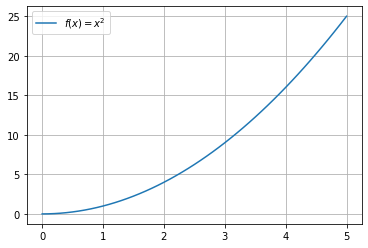

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Deinerer funksjonen
def f(x):
    return x**2

# Gjør klar listene for x- og y-verdier
x_verdier = [] 
y_verdier = []

# Fyller listene med verdier
for x in np.arange(0, 5.1, 0.1):
    x_verdier.append(x)
    y_verdier.append(f(x))

plt.plot(x_verdier, y_verdier, label='$f(x)=x^2$')
plt.legend()
plt.grid()
plt.show()    

Vi skal nå lage rektangler på samme måte som forklart ovenfor. Vi bruker denne koden:

In [2]:
# Beregner arealet under grafen numerisk.
A = 0 # Initierer variabelen som skal inneholde totalarealet.
dx = 1E-6 # bredden på hvert rektangel

for x in np.arange(0, 5+dx, dx): # Itererer fra 0 til 5 med rektangelbredde dx
    A += f(x) * dx # Legger til arealet av et nytt rektangel til totalarealet

print("Arealet under grafen er {:.3f} enheter".format(A))

Arealet under grafen er 41.667 enheter


## Ulike måter å summere rektangler

Ved å plassere rektanglene på litt ulike steder vil summeringen gi litt ulike resultat.


| Venstre | Høyre | Midt |
:-------------------------:|:-------------------------:|:-------------------------------:
| ![Riemann Venstre](./img/Riemann-venstre.png)  |  ![Riemann Høyre](./img/Riemann-hoyre.png) | ![Riemann Midt](./img/Riemann-midt.png)|


### Venstresum

Den enkleste Riemannsummeringen er en venstresum. Her vil øverste venstre hjørne på hvert rektangel være plassert på funksjonen, og så multipliserer vi denne med bredden $dx$. Funksjonen i eksemplet under er et venstresumareal for en funksjon $f(x)$ når $x\in[a,b]$

In [3]:
def A_v(f, a, b, dx):
    A = 0
    for x in np.arange(a, b, dx):
        A += f(x) * dx
    return A

### Høyresum

Denne metoden ligner veldig på venstresum, men i dette tilfellet vil øverste høyre hjørne på hvert rektangel plasseres på funksjonen. Koden i eksempelet under viser høyresumareal for en funksjon $f(x)$ når $x\in[a,b]$

In [4]:
def A_h(f, a, b, dx):
    A = 0
    for x in np.arange(a, b, dx):
        A += f(x + dx) * dx
    return A

### Midtsum

I denne metoden plasseres midten av topplinjen på hvert rektangel plasseres på funksjonen. Koden i eksempelet under viser midtsumareal for en funksjon $f(x)$ når $x\in[a,b]$

In [5]:
def A_m(f, a, b, dx):
    A = 0
    for x in np.arange(a, b, dx):
        A += f(x + dx/2) * dx
    return A

La oss sammenlikne resultatene fra de tre metodene. Vi bruker den samme funksjonen $f(x)$ som vi definerte tidligere, men ser nå på intervallet $x\in[0, 2]$.

In [6]:
print("Venstresum: ", A_v(f, 0, 2, 0.5))
print("Midtsum: ", A_m(f, 0, 2, 0.5))
print("Høyresum: ", A_h(f, 0, 2, 0.5))

Venstresum:  1.75
Midtsum:  2.625
Høyresum:  3.75


Fasitsvaret er $\frac{8}{3} \approx 2.67$, og vi ser at midtsum nærmest det riktige arealet. Prøv selv på ulike funksjoner, og se hvilken metode som gir best tilnærming.

## Oppgaver

1. Ta utgangspunkt i funksjonen $f(x) = x^2$, og integrer fra $x=0$ til $x=2$ i Geogebra. Sammenlikn med svarene fra venstresum, høyresum og midtsum ovenfor. Forsøk med ulike bredder $dx$ for å forbedre resultatene.

2. En husstands strømforbruk i antall kW gjennom et døgn er gitt ved funksjonen $f(t)=-0.003t^3+0.1t^2-0.7t+2$ for $t\in[0,24]$ timer. Hva er husstandens totale strømforbruk i kWh dette døgnet? (Kilde: [nkhansen](https://www.nkhansen.com/category/matematikk/funksjoner/integrasjon/))

3. Funksjonen $T(t)=3.2\sin(0.3t-4.5)+10.5$ når $t\in[0,24]$ er en modell for hvordan temperaturen endrer seg i løpet av et døgn et sted i Norge. Temperaturen $T$ er målt i °C, og $t$ er antall timer etter midnatt. Plot funksjonen $T(t)$, og bruk integrasjon til å finne gjennomsnittstemperaturen denne dagen. (Kilde: NDLA - R2 - [Oppgave 3.8.10](https://ndla.no/sites/default/files/r2_funksjoner_oppgaver_nb_02.12.2016.pdf) )

4. Farten til en bil er gitt ved funksjonen $v(t)=-4\cdot\left(\frac{t}{1000}\right)^3 + \frac{t}{50}$ for $t\in[0,2250]$. Finn tilbakelagt strekning i det samme intervallet. Beskriv bevegelsen til bilen.

5. Regn ut arealet under funksjonen $f(x)=x^2$ når $x\in[0,5]$ med venstre-,høyre- og midtpunktssummereing. Hver deloppgave skal løses tre ganger med rektangelbredder (dx) på 1, 0.1 og 0.001. Skriv ned resultatene. Hva ser du?

6. Regn ut arealet under funksjonen $f(x)=x^2$ når $x\in[-5,0]$ med venstre-,høyre- og midtpunktssummereing. Hver deloppgave skal løses tre ganger med rektangelbredder (dx) på 1, 0.1 og 0.001. Skriv ned resultatene. Hva ser du? Sammenlikn resultatene med oppgave 4.

7. Vi har fått måledata på hastigheten til en bil fra den starter til det har gått 6 minutter, og har tilpasset en funksjon til måledataene. Bruk funksjonen som er gitt nedenfor, og gjør en beregning for å finne ut hvor langt bilen har kjørt. Pass på enhetene som brukes.

<img alt="Graf tid/hastighet. Lisens: CC0" src="img/fart-tid.png">

